**Exercise:**
* This dataset related to MicroFinance Institution (MFI). 
* MFI is an organisation that provide financial service to low-income family 
* Build a model which can be used to predict in terms of a probability for each loan transaction, whether the 
  customer will be paying back the loaned amount within 5 days of insurance of loan. 
* In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, 
  while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter

**Points to Remember:**
* There are no null values in the dataset. 
* There may be some customers with no loan history. 
* The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
* For some features, there may be values which might not be realistic. You may have to observe them and treat
  them with a suitable explanation.

* You might come across outliers in some features which you need to handle as per your understanding. Keep in mind
  that data is expensive and we cannot lose more than 7-8% of the data.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)


In [2]:
df= pd.read_csv(r'E:\download\Micro-Credit-Project--1-\Data file.csv')

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:

df.shape    # lets check the dataset shape

(209593, 37)

In [3]:
## this is unnecessary columns
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
##  lets check the null value
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
##  dataset summary
df.info()
## In this dataset only three Variables are object datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [9]:

## Statatistical information

df.describe()
## according to this describe function  , less than 10 percent elements of some Variables are 30 or 40 times higher than
##  their another elements of Variables like (cnt_ma_rech90,medianmarechprebal90,medianmarechprebal30,last_rech_date_ma
#   ,last_rech_date_da,aon,maxamnt_loans30,fr_da_rech30,cnt_da_rech30)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [8]:
## lETS CHECK OBJECT DATATYPE VALUE 

df['pcircle'].value_counts()

## we can see that only one type of value in 'pcircle', so we will have to drop it because keeping it no matter

UPW    209593
Name: pcircle, dtype: int64

In [4]:
##
df.drop('pcircle', axis=1, inplace=True)

In [5]:
## 'pdate' this is Datetime columns,  I am converting into 'month','day' column and i am not taking the year 
##     because in year only 2016 value

df['pdate']= pd.to_datetime(df['pdate'])

df['month']= df['pdate'].dt.month
df['day']= df['pdate'].dt.day
df.drop('pdate', axis=1,inplace=True)

In [49]:
df['msisdn'].value_counts()   # this feature has unique value that's why droped it


04581I85330    7
47819I90840    7
30080I90588    6
55809I89238    6
22038I88658    6
              ..
36902I90840    1
17447I88689    1
59686I90584    1
00504I91190    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64

In [6]:

df.drop('msisdn', axis=1, inplace=True)

In [25]:


df.head(3)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,7,20
1,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,8,10
2,1,17943I70372,535.0,1398.00,1398.00,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,8,19


In [15]:
df.shape

(209593, 34)

In [13]:
# LETS COUNTS THE BOTH VALUE OF 'LABEL'

df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

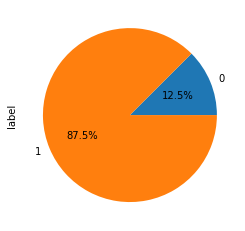

In [14]:
df['label'].value_counts().sort_values().plot.pie(autopct= '%1.1f%%')

#  we can see that the label Variables is  imbalanced

<AxesSubplot:>

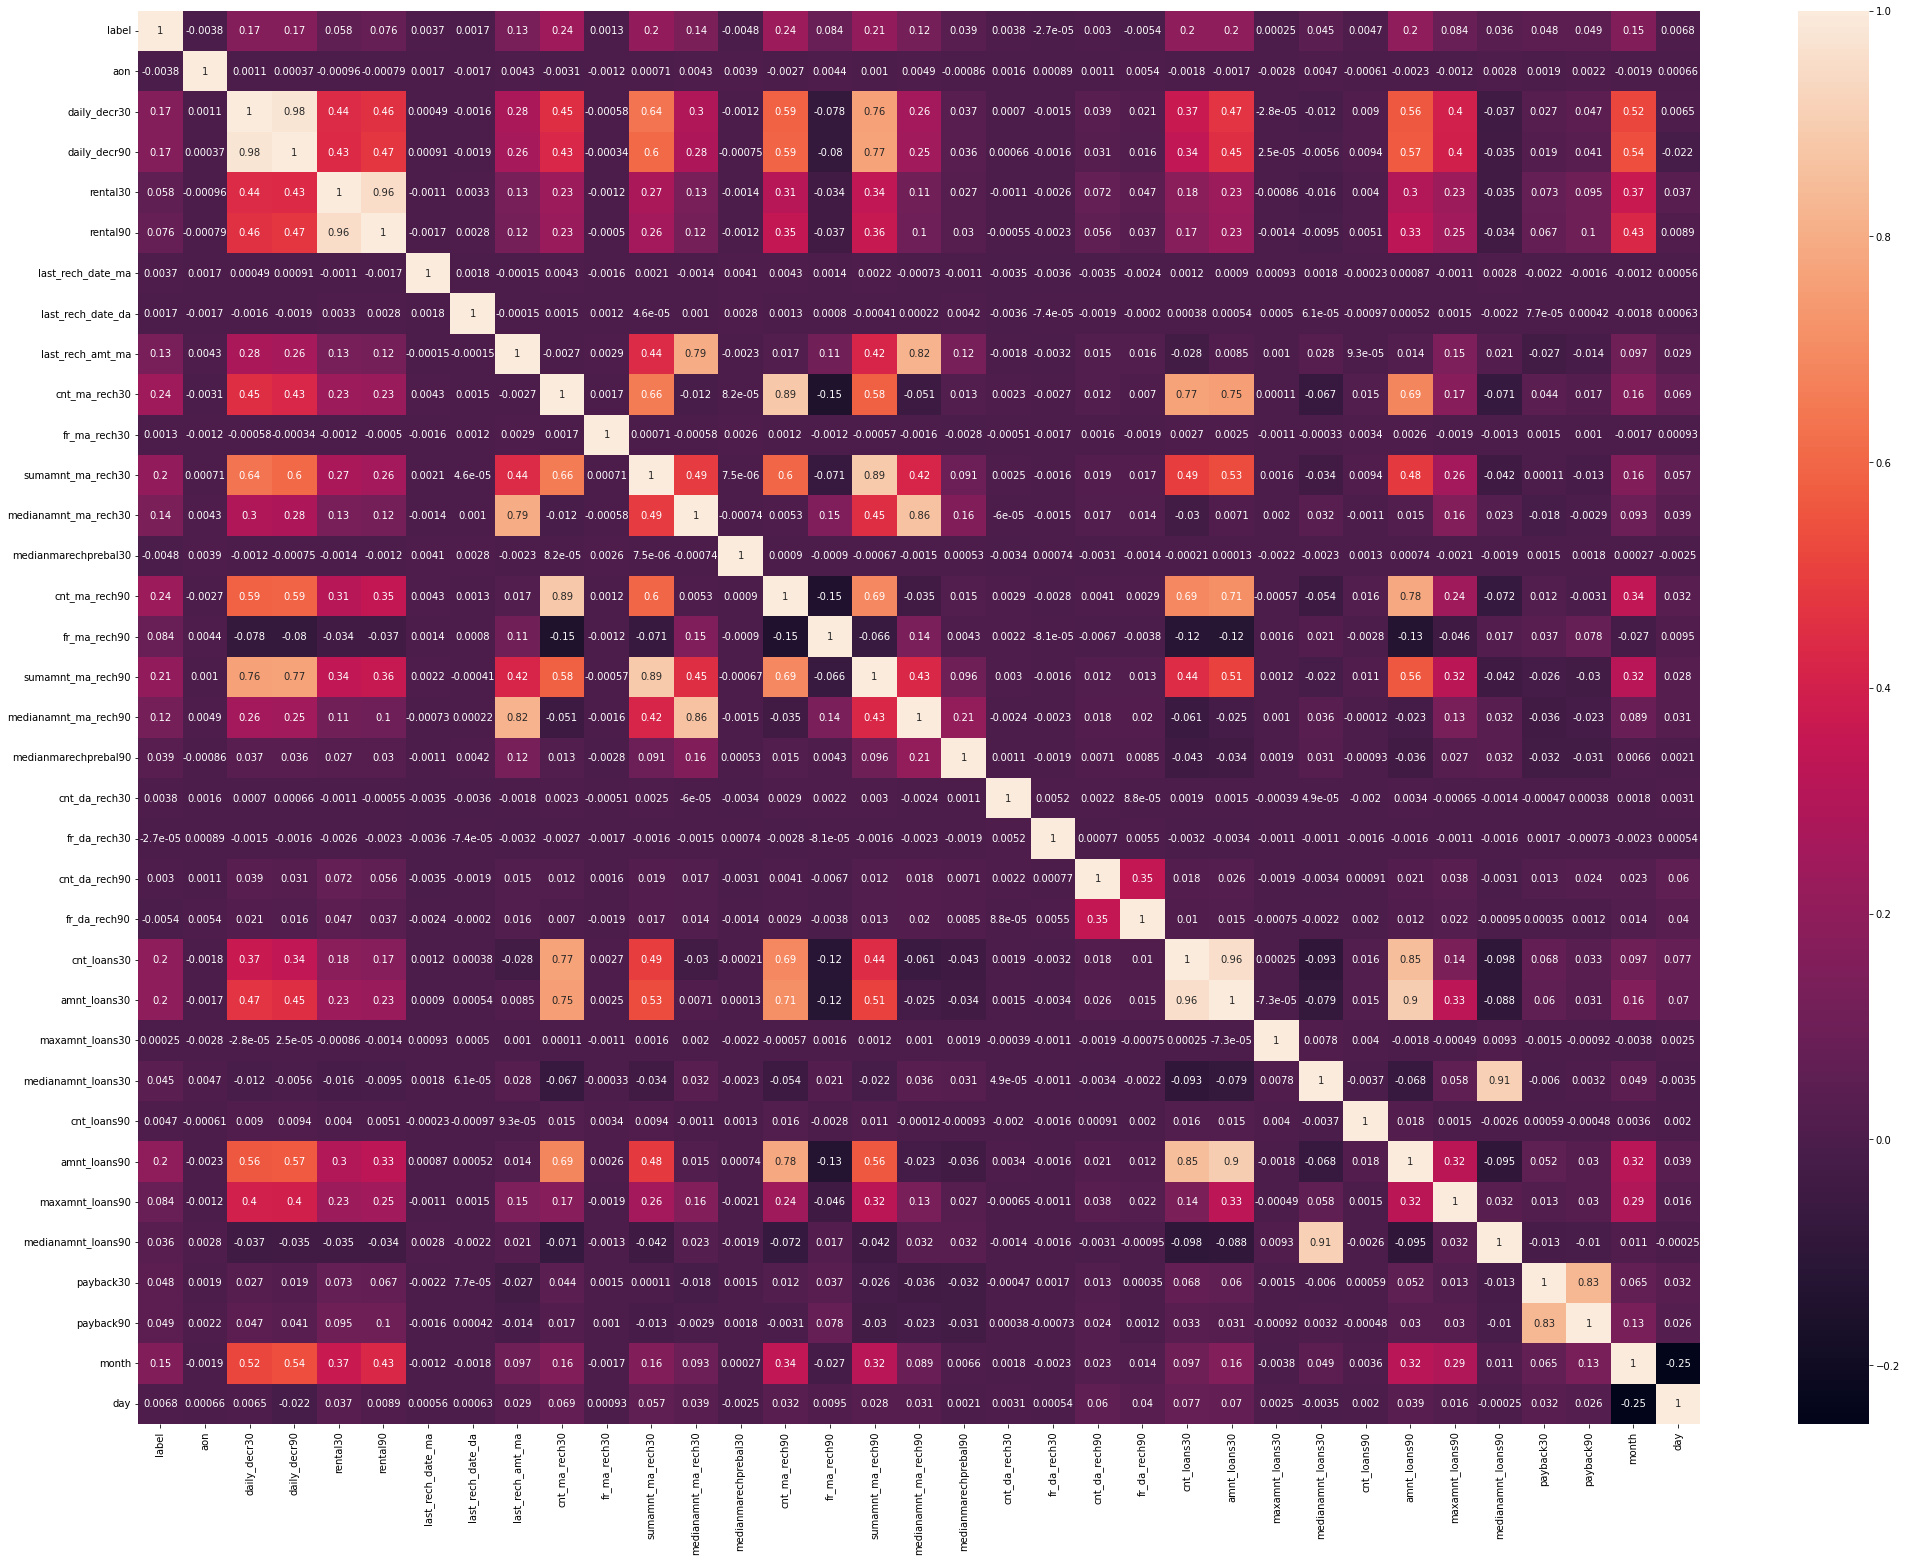

In [8]:
## ANALYZING THE  CORRELATION OF DATASET

plt.figure(figsize=(35,26))
sns.heatmap(df.corr(), annot=True, )

In [ ]:
( aon, last_rech_date_ma, last_rech_date_da,fr_ma_rech30, medianmarechprebal30, cnt_da_rech30, fr_da_rech30, cnt_da_rech90,
 maxamnt_loans30, cnt_loans90) these all variables are such types which are zero percent correlation with all other variables.

. some variables are highly positive correlated with each other
. half of all variables are low positive correlated with Target-Attributes and no any Variables are highly 
   positive correlated with Target

In [5]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [ ]:
PLOTTING  SCATTERPLOT & REGPLOT ON CONTINUOUS VARIABLES

<AxesSubplot:xlabel='day', ylabel='count'>

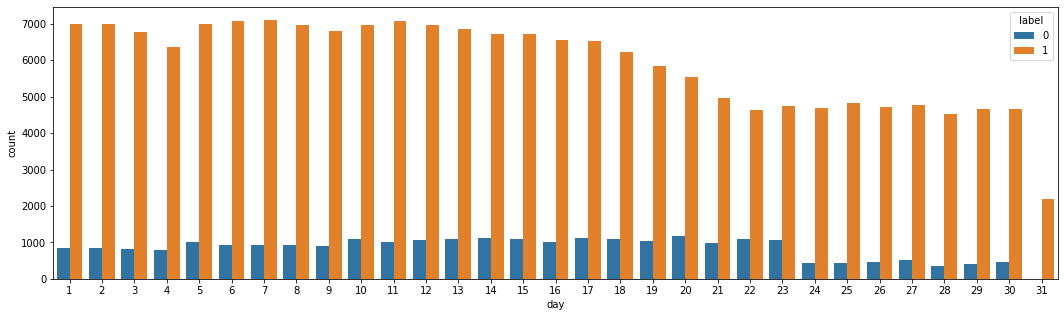

In [231]:
plt.figure(figsize=(18,5))
sns.countplot(df['day'], hue=df['label'])

<AxesSubplot:xlabel='month', ylabel='count'>

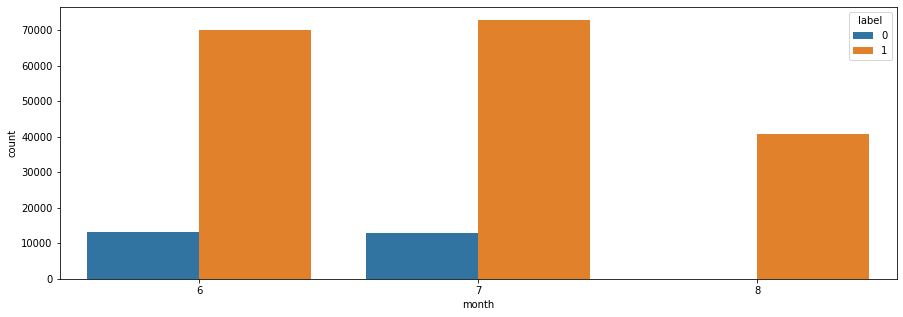

In [230]:
plt.figure(figsize=(15,5))
sns.countplot(df['month'], hue=df['label'])

## when there is 8 in 'month' variable then there is no zero in 'label' 

<AxesSubplot:xlabel='cnt_loans30', ylabel='count'>

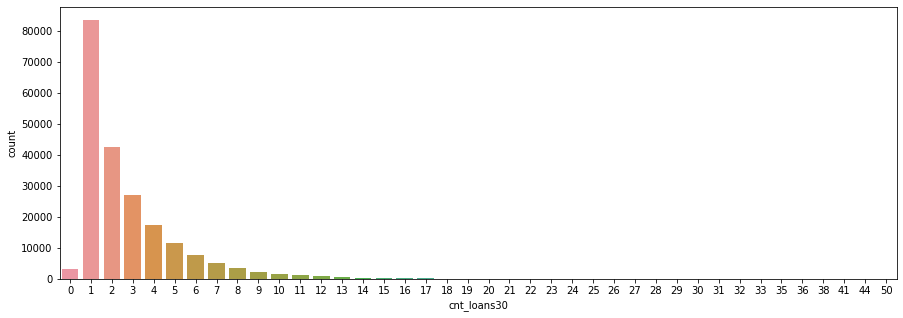

In [214]:

plt.figure(figsize=(15,5))
sns.countplot(df['cnt_loans30'])
# in this countplot we can see that above 99 percent elements are distributed  between (0 to 20) ,
#   very few elements are distributed between  21 to 50

<AxesSubplot:xlabel='cnt_loans30', ylabel='amnt_loans30'>

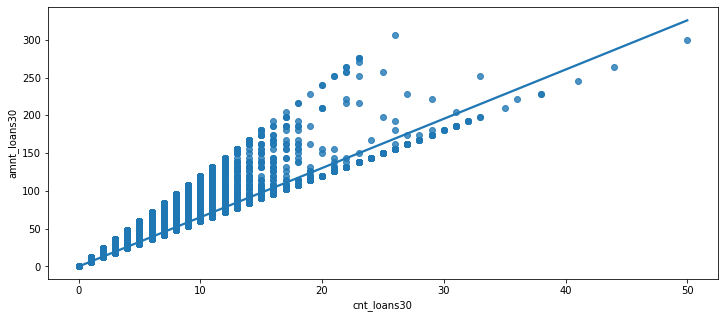

In [70]:

plt.figure(figsize=(12,5))
sns.regplot(df['cnt_loans30'],df['amnt_loans30'])
#  there is positive correlation between these two Variables

<AxesSubplot:xlabel='daily_decr30', ylabel='daily_decr90'>

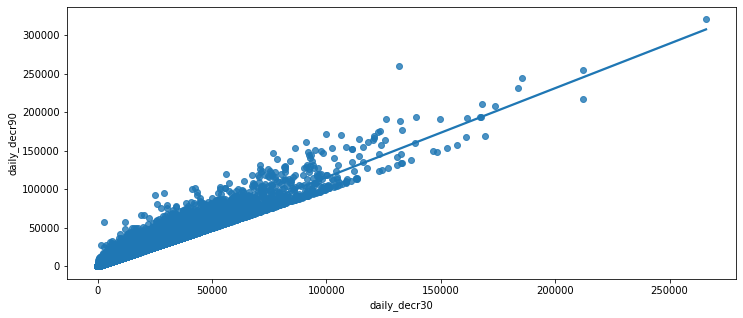

In [71]:
plt.figure(figsize=(12,5))
sns.regplot(df['daily_decr30'],df['daily_decr90'])
#
## #  there is positive correlation between these two Variables

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='medianamnt_loans90'>

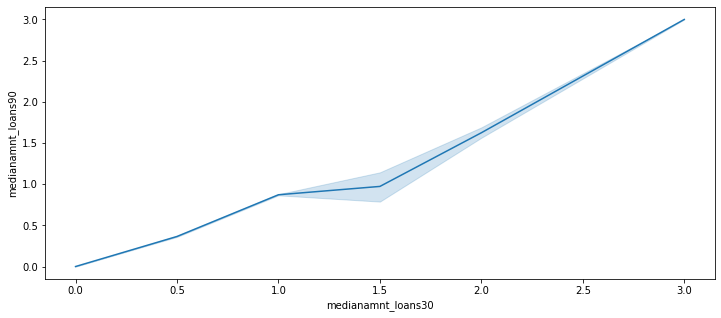

In [72]:
plt.figure(figsize=(12,5))
sns.lineplot(df['medianamnt_loans30'],df['medianamnt_loans90'])
# #  there is positive correlation between these two Variables

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='sumamnt_ma_rech90'>

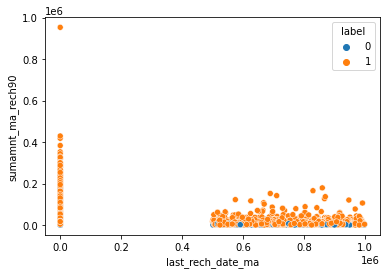

In [69]:

sns.scatterplot('last_rech_date_ma', 'sumamnt_ma_rech90', hue='label', data=df)
## 
## there is no any relation between these two Variable's distribution

<AxesSubplot:xlabel='daily_decr30', ylabel='rental30'>

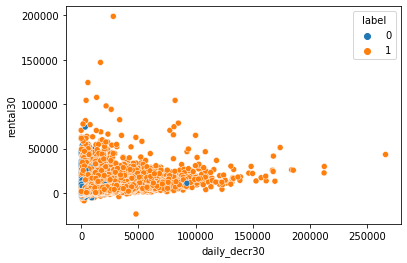

In [67]:
sns.scatterplot('daily_decr30', 'rental30', hue='label', data=df)
## 
##  these Variables are randomly distributed with each other

In [66]:

##  this Variable's elements going to higher than 23 then only 1200 have remained out of 209000 rows ,
#  so these are outliers = 0.5 elements . we will have to drop these rows 
# this type of Variables is also something else in this Dataset
df[df['cnt_ma_rech30']>=23].shape

(1233, 36)

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='last_rech_date_da'>

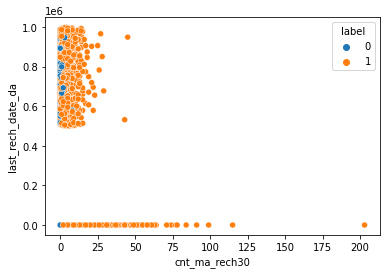

In [49]:
sns.scatterplot('cnt_ma_rech30', 'last_rech_date_da', hue='label', data=df)

<AxesSubplot:xlabel='cnt_da_rech30', ylabel='cnt_ma_rech30'>

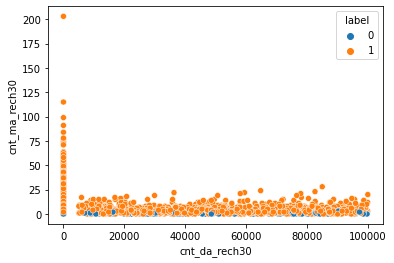

In [48]:
sns.scatterplot('cnt_da_rech30', 'cnt_ma_rech30', hue='label', data=df)

## these Attributes are randomly distributed, there is no any relation 

<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='medianmarechprebal30'>

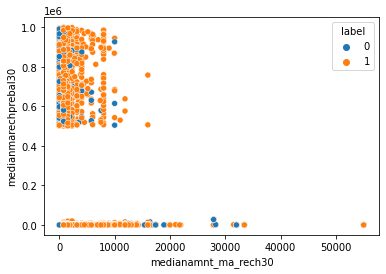

In [44]:
sns.scatterplot('medianamnt_ma_rech30', 'medianmarechprebal30', hue='label', data=df)

In [ ]:
## PLOTTING DISTRIBUTION PLOT

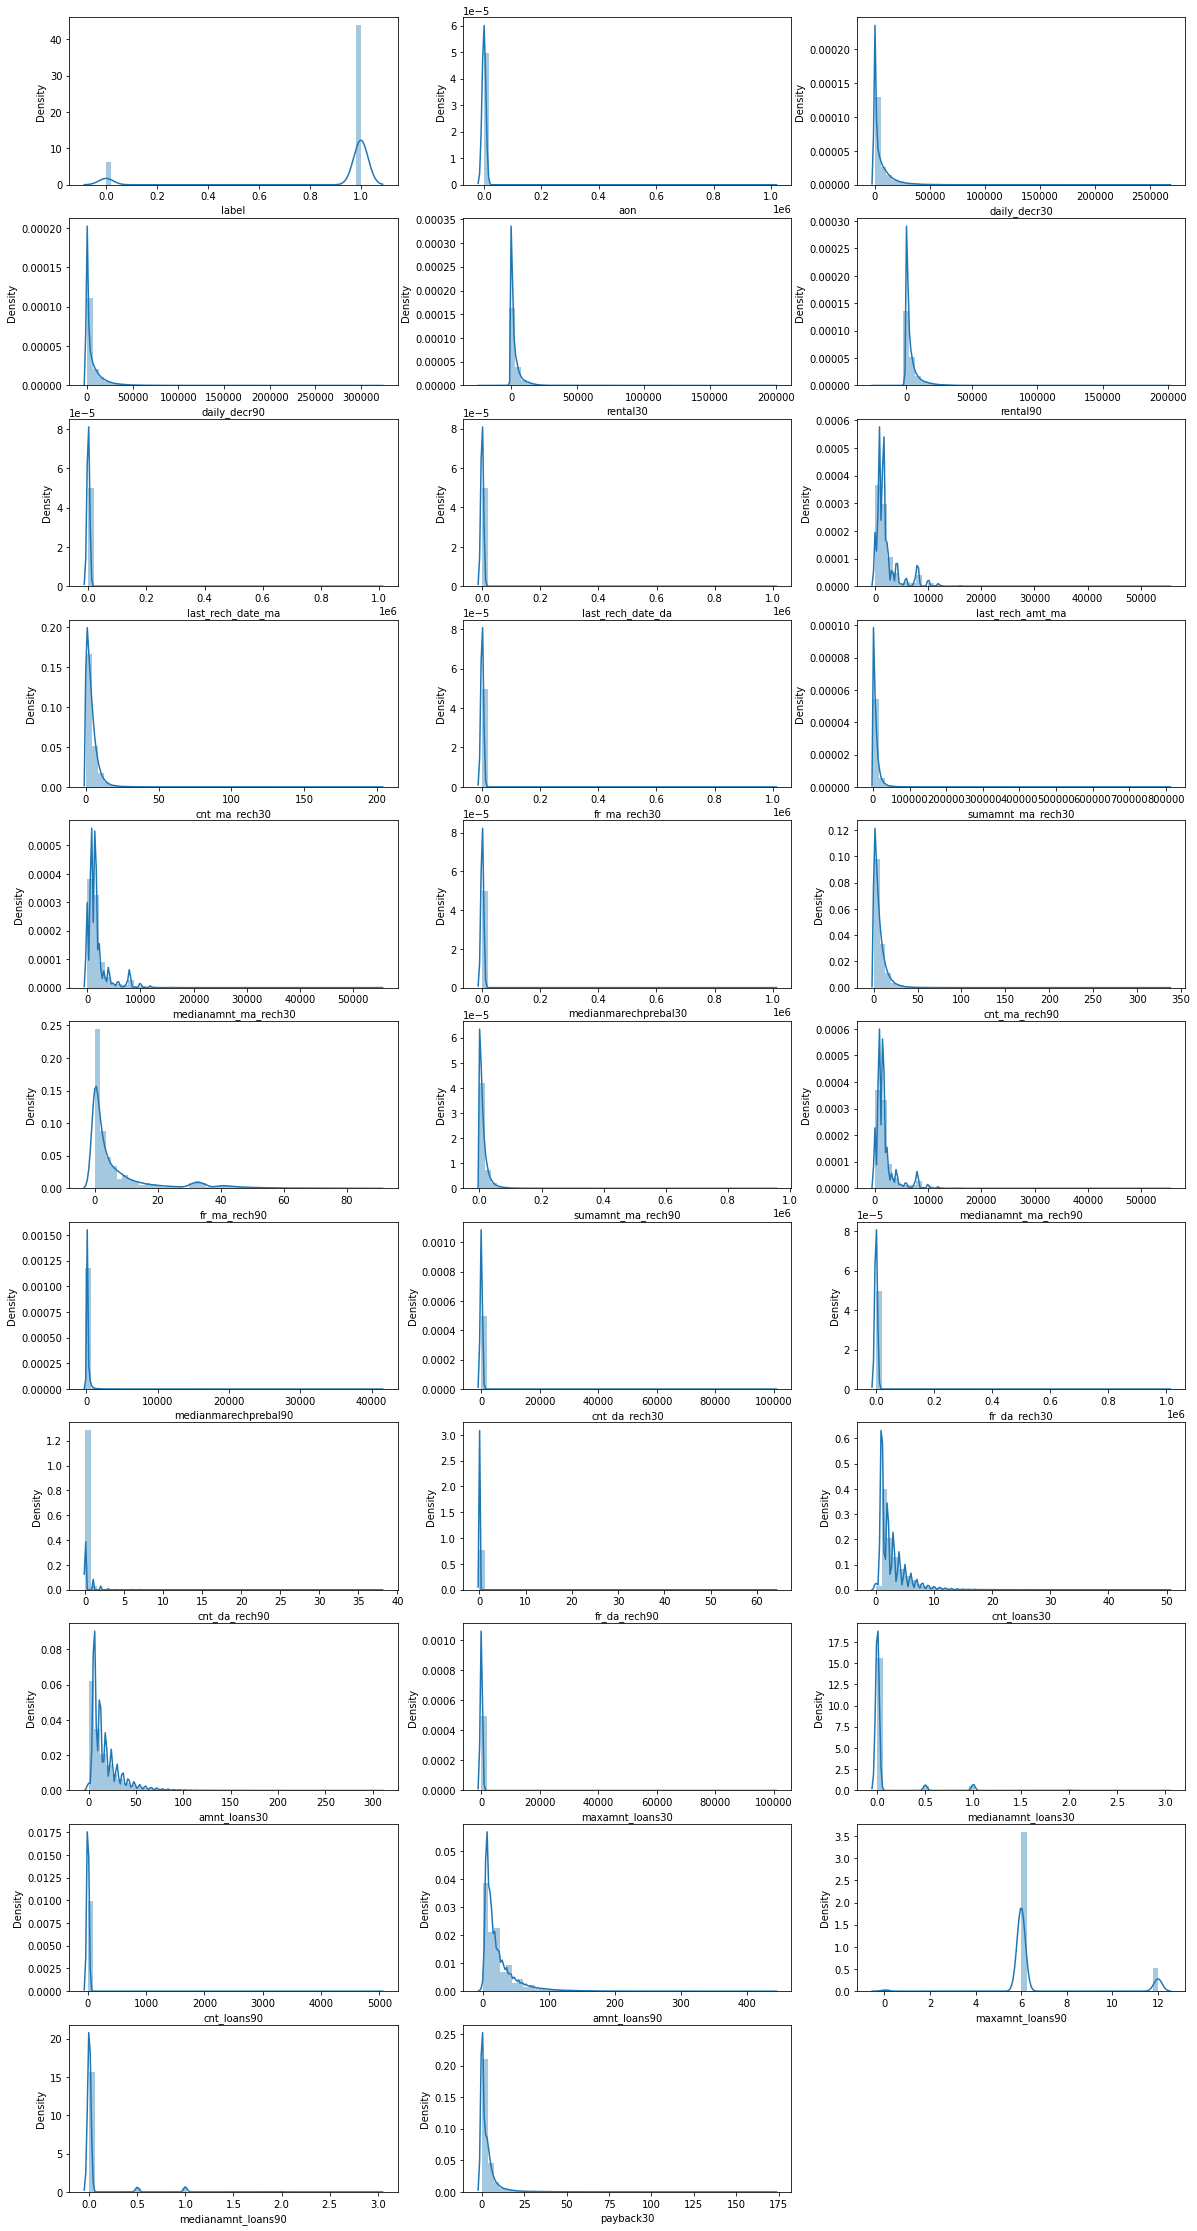

In [18]:
# lets see how is data distributed for every columns  / CHECK DATA IS NORMAL DISTRIBUTED OR NOT
plt.figure(figsize=(20,40),)
p=1
for col in df.select_dtypes(include=['float','int']):
    if p <= 32:
        ax = plt.subplot(11,3,p)
        sns.distplot(df[col])
        plt.xlabel=(col)
    p+=1    
plt.show()        

In [ ]:
## we can see that in distribution plot , above 90 percent elements distributed nearabout zero of maximum Variables


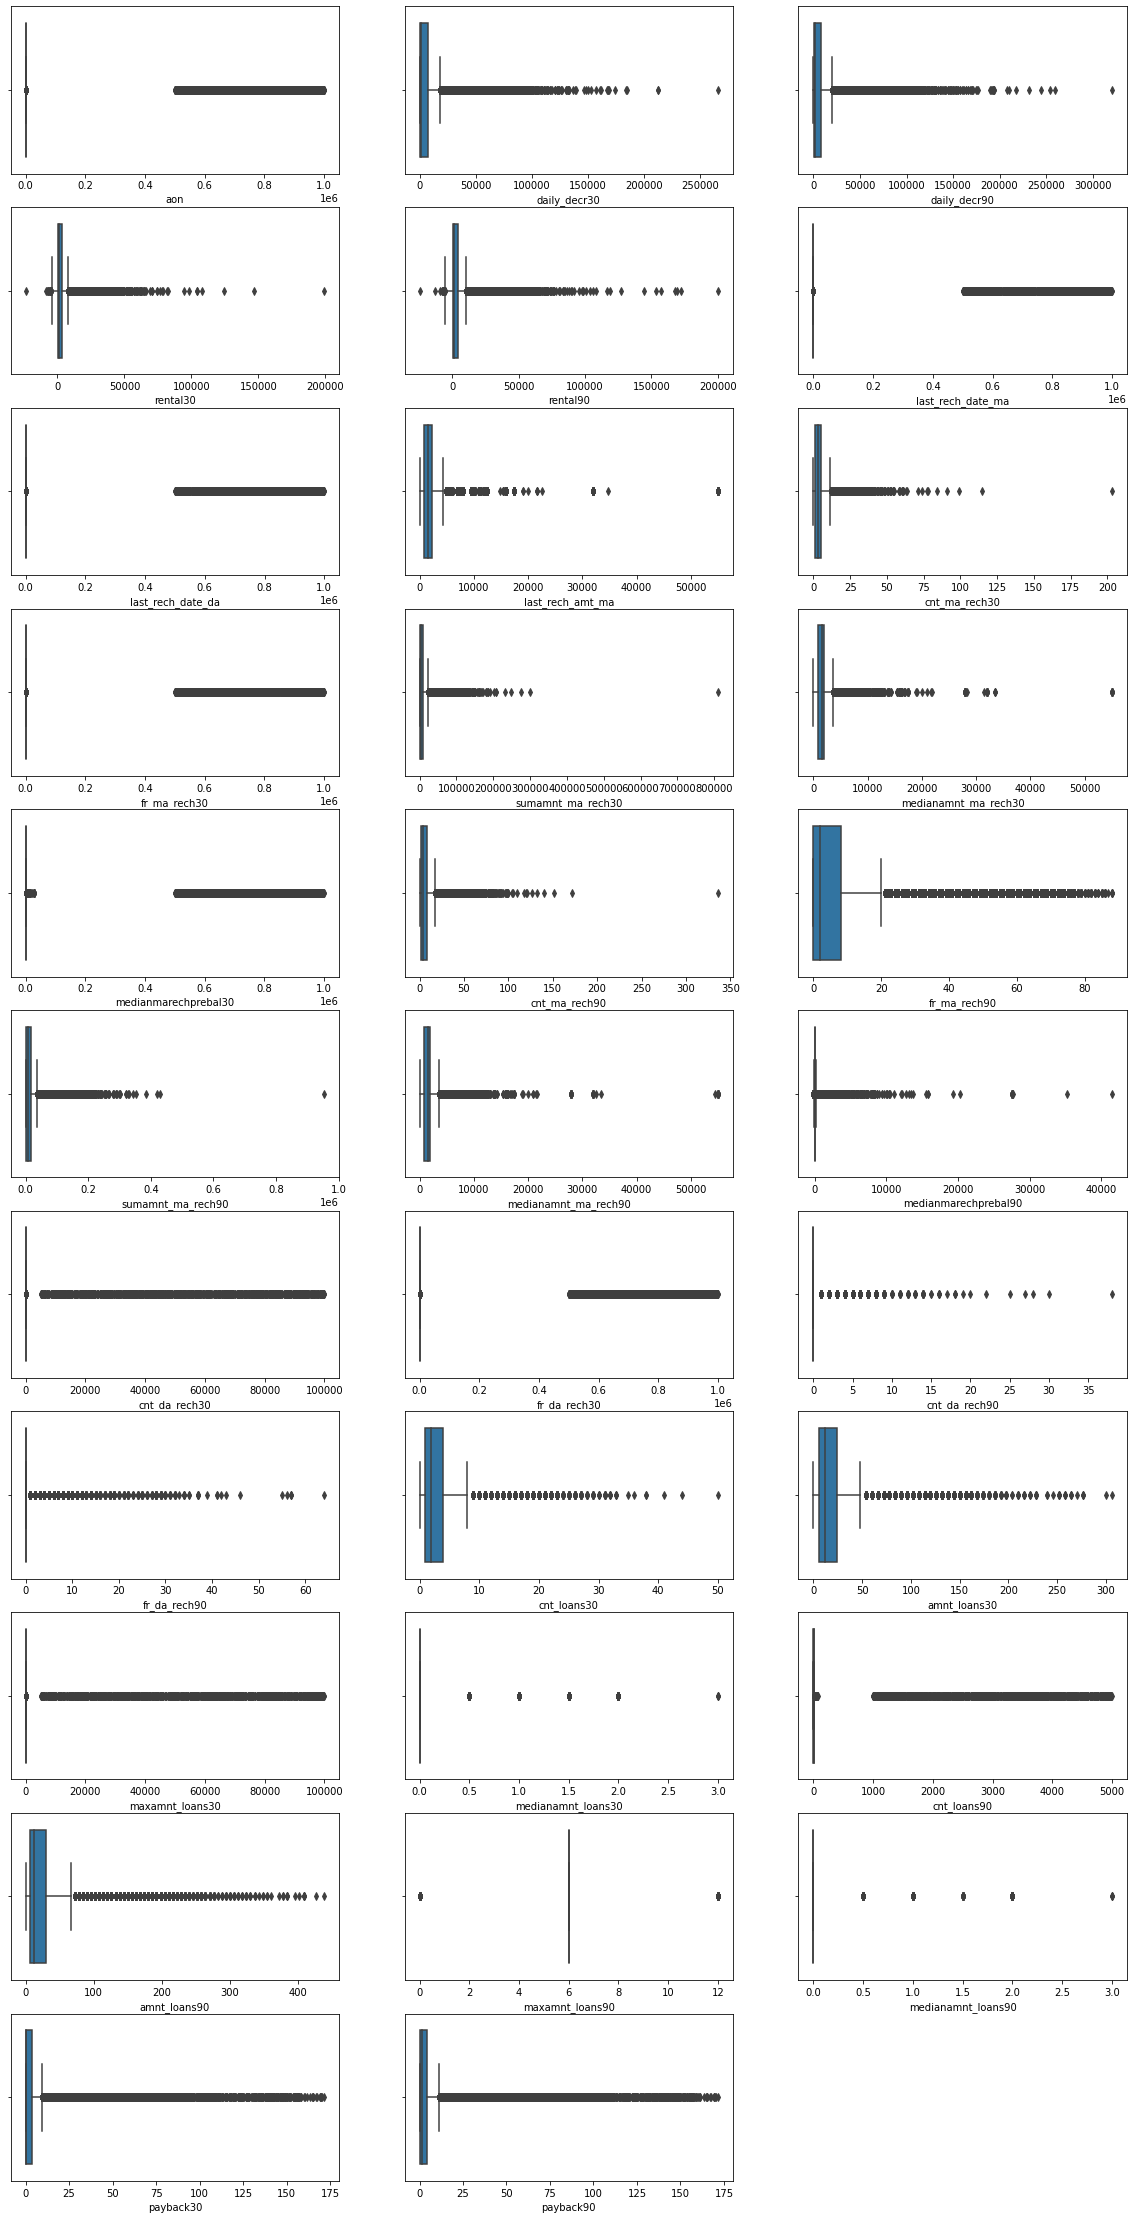

In [7]:
## plotting boxplot to check outliers 

dc= df.drop(['label','month','day',],axis=1)
plt.figure(figsize=(20,40),)
p=1
for col in dc.columns:
    if p <= 32:
        ax = plt.subplot(11,3,p)
        sns.boxplot(df[col])
        plt.xlabel=(col)
    p+=1    
plt.show()        

In [8]:
#OUTLIER METHOD

from scipy.stats import zscore

z_scores=zscore(dc)
df_new = df.loc[(abs(z_scores)<7).all(axis=1)]
print('original-shape=', df.shape)
print('new dataset-shape=', df_new.shape)

##  The maximum variables in this dataset has more than 15 percent elements are outliers because
##    it is more than 40 times of all other elements of the Variables
#  we don't have to remove more than 7 percent elements 
 #  we have removed 13816 elements through outliers  method  , equal to 7 percent

original-shape= (209593, 35)
new dataset-shape= (195777, 35)


In [9]:
X= df_new.drop(['label','month','day'],axis=1)

X.skew()     ## still there is outliers in this data so skewness is showing so much and difference between outliers & normal 
 #                        elements is very hugh

aon                     36.044374
daily_decr30             2.605129
daily_decr90             2.761634
rental30                 2.736858
rental90                 2.874171
last_rech_date_ma        3.115086
last_rech_date_da        9.953405
last_rech_amt_ma         2.287840
cnt_ma_rech30            1.936525
fr_ma_rech30             2.019305
sumamnt_ma_rech30        2.463122
medianamnt_ma_rech30     2.493321
medianmarechprebal30    10.655984
cnt_ma_rech90            2.119148
fr_ma_rech90             2.275707
sumamnt_ma_rech90        2.549652
medianamnt_ma_rech90     2.511126
medianmarechprebal90     5.965492
cnt_da_rech30           32.605088
fr_da_rech30            80.606405
cnt_da_rech90            7.445251
fr_da_rech90            60.304176
cnt_loans30              2.153480
amnt_loans30             2.243547
maxamnt_loans30         33.333274
medianamnt_loans30       4.087970
cnt_loans90             35.041355
amnt_loans90             2.464764
maxamnt_loans90          1.717543
medianamnt_loa

In [11]:


###  APPLY POWER_TRANSFORMER TO REMOVE SKEWNESS OF THIS  DATASET

from sklearn.preprocessing import power_transform
x_new= power_transform(X )

x_new=pd.DataFrame(x_new, columns=X.columns)
x_new.skew()

##  The skewness of some variables could not be remove because the outliers of that variable is too high

aon                      9.810723
daily_decr30            -2.155429
daily_decr90            -2.326449
rental30                 0.427091
rental90                 0.450420
last_rech_date_ma        0.123716
last_rech_date_da      -56.592929
last_rech_amt_ma        -0.087208
cnt_ma_rech30           -0.004438
fr_ma_rech30             0.135787
sumamnt_ma_rech30       -0.345229
medianamnt_ma_rech30    -0.211003
medianmarechprebal30     2.025824
cnt_ma_rech90           -0.007129
fr_ma_rech90             0.142711
sumamnt_ma_rech90       -0.243755
medianamnt_ma_rech90    -0.070423
medianmarechprebal90     1.548352
cnt_da_rech30            8.984124
fr_da_rech30            65.936840
cnt_da_rech90            6.625158
fr_da_rech90            49.439360
cnt_loans30              0.037815
amnt_loans30             0.004767
maxamnt_loans30         -1.069251
medianamnt_loans30       3.516591
cnt_loans90              0.095048
amnt_loans90            -0.006045
maxamnt_loans90          0.375706
medianamnt_loa

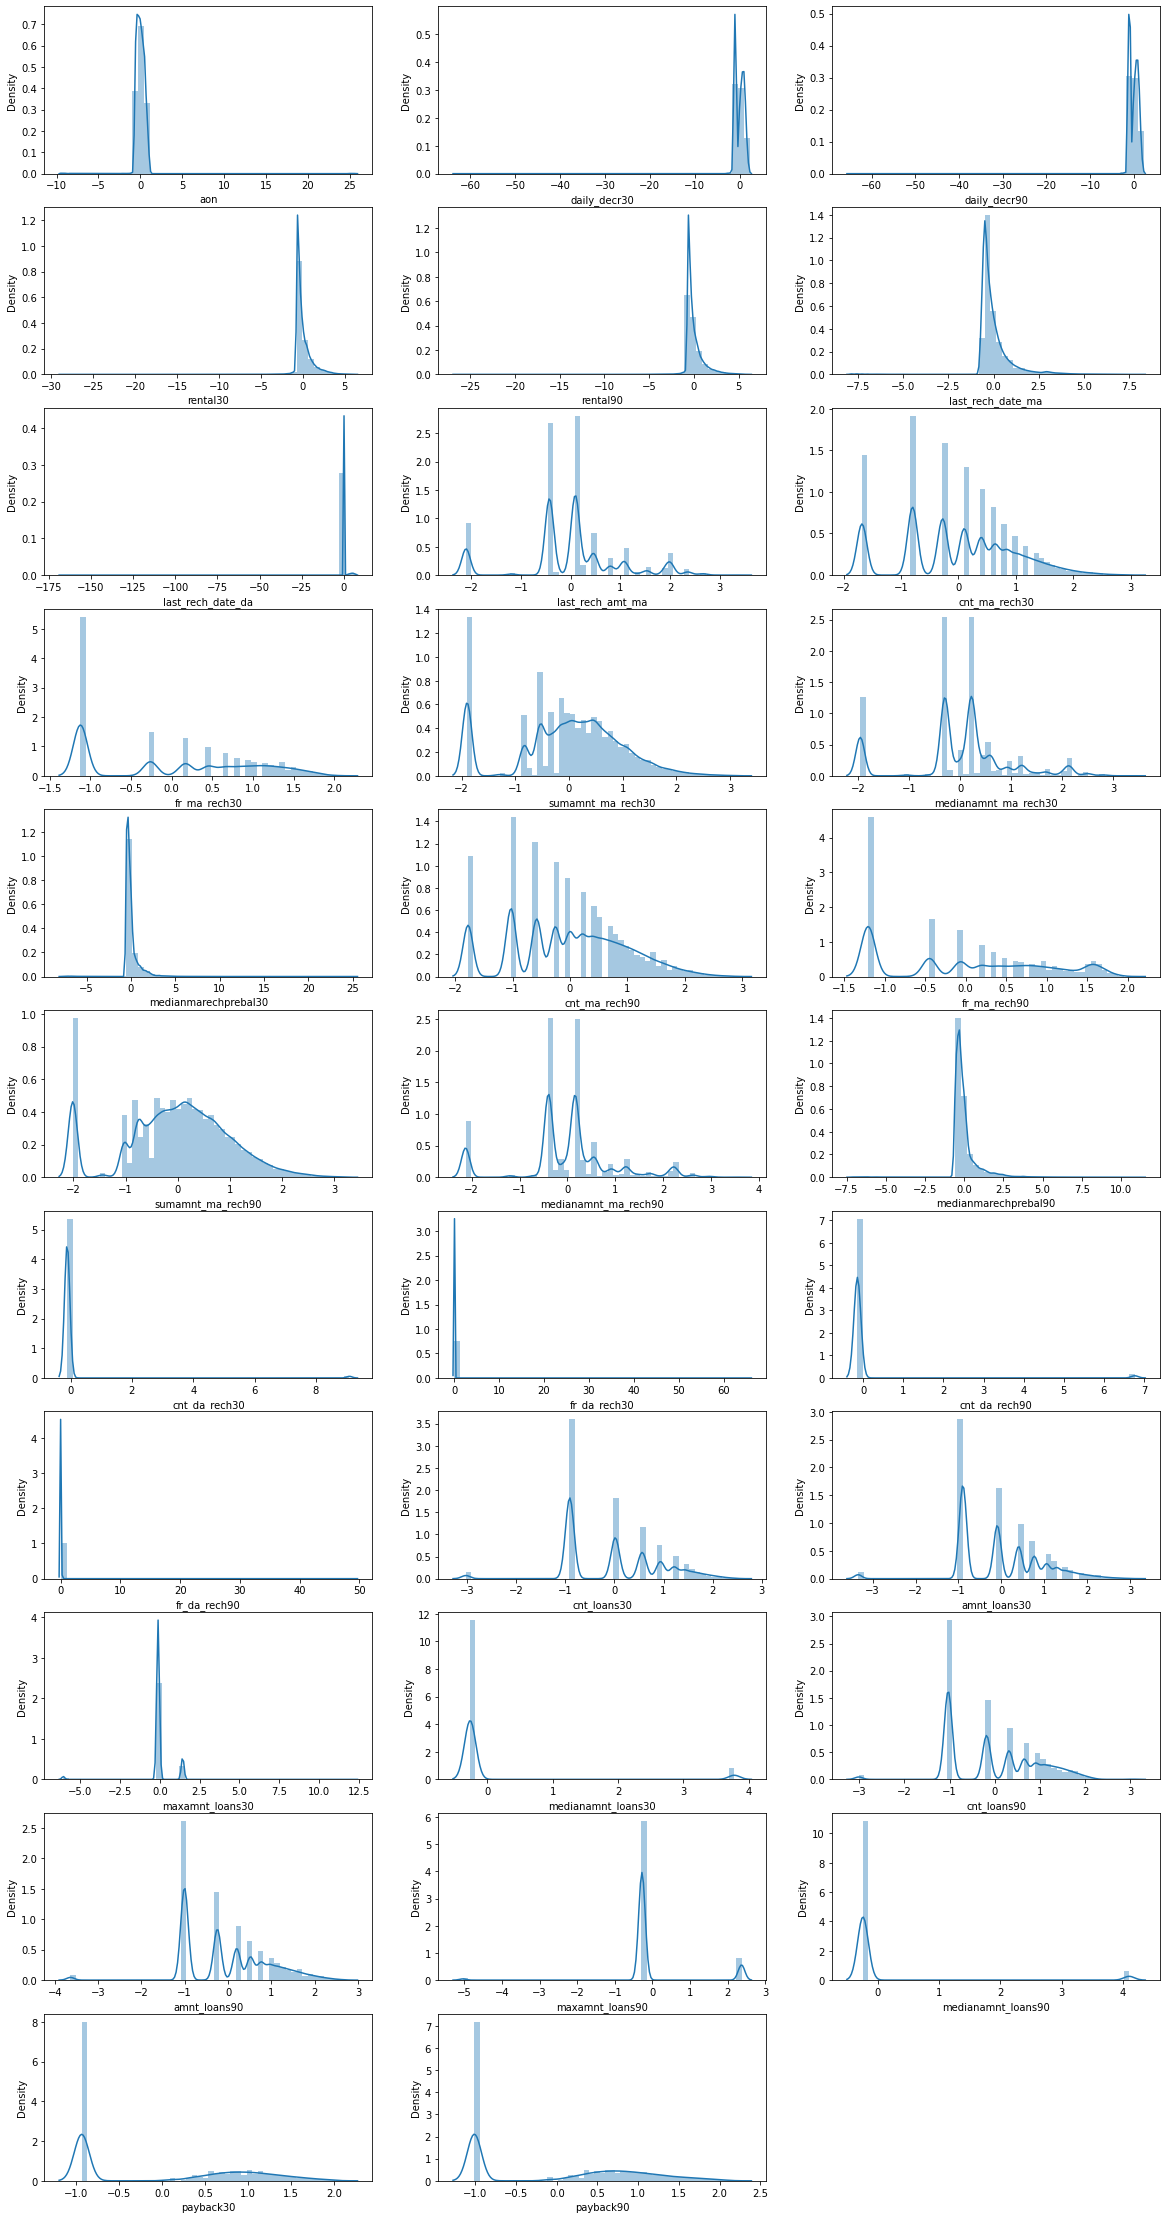

In [290]:
## AFTER REMOVING SKEWNESS CHECKING   again DISTRIBUTION PLOT
plt.figure(figsize=(20,40),)
p=1
for col in x_new.columns:
    if p <= 33:
        ax = plt.subplot(11,3,p)
        sns.distplot(x_new[col])
        plt.xlabel=(col)
    p+=1    
plt.show()        

In [12]:

y = df_new.label            ##  Input-Variables 

In [13]:
print(x_new.shape)
print(y.shape)

(195777, 32)
(195777,)


In [14]:
# make sure to  use 'variance_inflation_factor' method to check  multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

features= x_new.columns
vif_value= [vif(x_new.values, i) for i in range(len(x_new.columns))]

pd.DataFrame({'features':features,'vif_value':vif_value})   #


,features,vif_value
0,aon,1.017249
1,daily_decr30,287.266784
2,daily_decr90,299.069470
3,rental30,14.547927
4,rental90,15.573709
5,last_rech_date_ma,1.689901
6,last_rech_date_da,1.712619
7,last_rech_amt_ma,6.565070
8,cnt_ma_rech30,54.177179
9,fr_ma_rech30,2.081795


In [14]:
## this dataset has multicollinearity problem so we will have to remove some Variables like
## (daily_decr90,cnt_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech90,cnt_loans30,amnt_loans90  )

x_new= x_new.drop(['daily_decr90','cnt_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech90','cnt_loans30',
                   'amnt_loans90','rental90'], axis=1)

In [16]:
                         ##  CHECKING AGAIN AFTER REMOVING MULTICORRELATED COLUMNS

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
features= x_new.columns
vif_value= [vif(x_new.values, i) for i in range(len(x_new.columns))]

pd.DataFrame({'features':features,'vif_value':vif_value})   #

# 

,features,vif_value
0,aon,1.016989
1,daily_decr30,2.236206
2,rental30,1.291127
3,last_rech_date_ma,1.447140
4,last_rech_date_da,1.712241
5,last_rech_amt_ma,5.428749
6,fr_ma_rech30,2.032477
7,medianamnt_ma_rech30,4.545139
8,medianmarechprebal30,2.793532
9,cnt_ma_rech90,9.316035


In [15]:
# we use over sampling with SMOTE because target is imbalanced

from imblearn.over_sampling import SMOTE
smp= SMOTE(0.75)
xtrain, ytrain= smp.fit_resample(x_new,y)

print(y.value_counts(),)
print('\n after over_sampling \n', ytrain.value_counts())

1    171218
0     24559
Name: label, dtype: int64

 after over_sampling 
 1    171218
0    128413
Name: label, dtype: int64


In [16]:
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [17]:
### scaled the input data

scaler= StandardScaler()
scaled= scaler.fit_transform(xtrain)
scaled= pd.DataFrame(scaled, columns=x_new.columns)

In [18]:
# 
from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import KFold
kfold= KFold(n_splits=20, shuffle=True, random_state=59)


    
def model_score(model,xtrain,ytrain,x_test,y_test):
    model.fit(xtrain,ytrain)
    pred= model.predict(xtrain)
    y_pred= model.predict(x_test)
    print('training_score =', accuracy_score(ytrain,pred))
        
    print('test_accuracy_score=', accuracy_score(y_test,y_pred))
    print('classification_report \n', classification_report(y_test,y_pred))
    print('confusion_matrix \n', confusion_matrix(y_test,y_pred))
    print('roc_auc_score =', roc_auc_score(y_test,y_pred))

def cross_val(model,xtrain,ytrain,algo):
        
    cv_score= CVS(model,xtrain,ytrain,cv= kfold,)
    print('cross_val_score with', algo,'=', cv_score.mean())
    

In [21]:

##                   LOGISTIC-REGRESSION
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(scaled, ytrain,random_state = 54,test_size=0.30,)

LR = LogisticRegression()
model_score(LR, x_train,y_train,x_test,y_test)

training_score = 0.7697731964661177
test_accuracy_score= 0.7710868839692958
classification_report 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73     38564
           1       0.79      0.81      0.80     51326

    accuracy                           0.77     89890
   macro avg       0.77      0.76      0.77     89890
weighted avg       0.77      0.77      0.77     89890

confusion_matrix 
 [[27597 10967]
 [ 9610 41716]]
roc_auc_score = 0.7641905300211345


In [22]:
####                                   KNN-CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(scaled, ytrain,random_state = 51,test_size=0.30,)
knn = KNeighborsClassifier()

model_score(knn, x_train,y_train,x_test,y_test )

training_score = 0.9137507688053361
test_accuracy_score= 0.8757481366114139
classification_report 
               precision    recall  f1-score   support

           0       0.79      0.96      0.87     38621
           1       0.96      0.81      0.88     51269

    accuracy                           0.88     89890
   macro avg       0.88      0.89      0.88     89890
weighted avg       0.89      0.88      0.88     89890

confusion_matrix 
 [[37034  1587]
 [ 9582 41687]]
roc_auc_score = 0.8860059003695399


In [20]:
###   
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(scaled, ytrain,random_state = 53,test_size=0.30,)
RF= RandomForestClassifier(n_jobs=-1)
model_score(RF, x_train,y_train,x_test,y_test )

training_score = 0.9997520751784343
test_accuracy_score= 0.9331627544776949
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     38664
           1       0.94      0.95      0.94     51226

    accuracy                           0.93     89890
   macro avg       0.93      0.93      0.93     89890
weighted avg       0.93      0.93      0.93     89890

confusion_matrix 
 [[35458  3206]
 [ 2802 48424]]
roc_auc_score = 0.9311908512683444


In [23]:
###                      
import xgboost as xgb
XGB = xgb.XGBClassifier()
model_score(XGB, x_train,y_train,x_test,y_test )

training_score = 0.9284498500531608
test_accuracy_score= 0.9240182445210813
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91     38621
           1       0.92      0.95      0.93     51269

    accuracy                           0.92     89890
   macro avg       0.92      0.92      0.92     89890
weighted avg       0.92      0.92      0.92     89890

confusion_matrix 
 [[34511  4110]
 [ 2720 48549]]
roc_auc_score = 0.9202638550887706


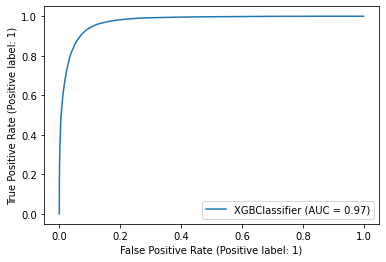

In [24]:
## PLOTTING  ROC CURVE 
plot_roc_curve(XGB,x_test, y_test)
             

In [ ]:


##     GRADIENTBOOSTING CLASSIFIER

In [25]:
###
from sklearn.ensemble import GradientBoostingClassifier
x_train,x_test,y_train,y_test=train_test_split(scaled, ytrain,random_state = 51,test_size=0.30,)

GB = GradientBoostingClassifier()
model_score(GB, x_train,y_train,x_test,y_test )

training_score = 0.8657773158323837
test_accuracy_score= 0.8642785626877294
classification_report 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84     38621
           1       0.88      0.88      0.88     51269

    accuracy                           0.86     89890
   macro avg       0.86      0.86      0.86     89890
weighted avg       0.86      0.86      0.86     89890

confusion_matrix 
 [[32352  6269]
 [ 5931 45338]]
roc_auc_score = 0.8609975206868082


In [ ]:
###   LETS USE CROSS-VALIDATION 

In [26]:

x_train,x_test,y_train,y_test=train_test_split(scaled, ytrain,random_state = 53,test_size=0.30,)
cross_val(knn, x_train,y_train, 'knn-Classifier')                   ##  cross-validation-score   KNN-Classifier
print('*'*20)

x_train,x_test,y_train,y_test=train_test_split(scaled, ytrain ,random_state = 52,test_size=0.30,)
cross_val(GB ,x_train,y_train, 'GradientBoosting-Classifier')          ##  cross-validation GRADIENTBOOSTING-Classifier
print('*'*20)

x_train,x_test,y_train,y_test=train_test_split(scaled, ytrain,random_state = 53,test_size=0.30,)
cross_val(XGB ,x_train,y_train,'XGBoost Classifier')                  ##   cross-validation   XGBoost-Classifier
print('*'*20)


x_train,x_test,y_train,y_test=train_test_split(scaled, ytrain,random_state = 56,test_size=0.30,)
cross_val(RF,x_train,y_train, 'RandomForest Classifier')                   ##  cross-validation    RANDOMFOREST-Classifier



cross_val_score with knn-Classifier = 0.8719611435305066
********************
cross_val_score with GradientBoosting-Classifier = 0.8626925506985984
********************
cross_val_score with XGBoost Classifier = 0.9220324065275107
********************
cross_val_score with RandomForest Classifier = 0.9314916993957938


In [ ]:
LETS USE HYPERPARAMETER TUNING WITH GRIDSEARCHCV

In [28]:

x_train,x_test,y_train,y_test=train_test_split(scaled, ytrain,random_state = 53,test_size=0.30,)
RF= RandomForestClassifier()
param= {'n_estimators':[100,280,480],'max_depth':[13,17,19,26],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3] }
grid= GridSearchCV(RF, param, cv= kfold, n_jobs=-1, scoring='accuracy')
grid.fit(x_train, y_train)
print('best_parameter=', grid.best_params_ )

best_parameter= {'max_depth': 26, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 480}


In [30]:
grid_rf= RandomForestClassifier(n_estimators=480,max_depth=26,min_samples_leaf=2,min_samples_split=3)
grid_rf.fit(x_train, y_train)
pred = grid_rf.predict(x_test)

print('accuracy_score=', accuracy_score(y_test, pred))
print('classification_report \n ', classification_report(y_test, pred), '\n')
print('roc_auc_score =', roc_auc_score(y_test, pred))


accuracy_score= 0.9239959951051285
classification_report 
                precision    recall  f1-score   support

           0       0.92      0.90      0.91     38664
           1       0.93      0.94      0.93     51226

    accuracy                           0.92     89890
   macro avg       0.92      0.92      0.92     89890
weighted avg       0.92      0.92      0.92     89890
 

roc_auc_score = 0.9215656027913742


In [31]:
confusion_matrix(y_test, pred)

array([[34959,  3705],
       [ 3127, 48099]], dtype=int64)

In [ ]:
SAVE THE MODEL

In [60]:
import pickle

In [61]:
##  SAVE   THE  RANDOMFOREST MODEL
micro_credit = 'micro_credit.pickle'

pickle.dump(RF, open(micro_credit, 'wb'))